# Constants

In [42]:
import numpy as np
import pandas as pd
import json
import nltk.data
from nltk.corpus import stopwords
from gensim.models import word2vec
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

import random as ra

from matplotlib.patches import Ellipse
from matplotlib.patches import Arc

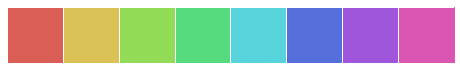

In [20]:
title_size=20
label_size=18
legend_size=16
ticklabel_size=14
text_size=14
sns.palplot(sns.color_palette("hls", 8))

MachineLearning_color=(214/255.,95/255.,95/255.)
datascience_color=(72/255.,120/255.,207/255.)
compsci_color=(207/255., 120/255., 72/255.)

# Create, fill dataframes

In [3]:
columns=['link', 'ups', 'body']
r_MachineLearning_df=pd.DataFrame(columns=columns)
r_datascience_df=pd.DataFrame(columns=columns)

se_datascience_questions_df=pd.DataFrame(columns=columns)
se_datascience_answers_df=pd.DataFrame(columns=columns)

df_list=[r_MachineLearning_df, r_datascience_df, se_datascience_questions_df, se_datascience_answers_df]

In [4]:
r_directory='/home/preston/Desktop/Programming/datasci/projects/blog_finder/data/reddit/'
se_directory='/home/preston/Desktop/Programming/datasci/projects/blog_finder/data/stackexchange/'

In [5]:
r_MachineLearning_filename='MachineLearning_links'
r_MachineLearning_filehandle=open(r_directory+r_MachineLearning_filename)

r_datascience_filename='datascience_links'
r_datascience_filehandle=open(r_directory+r_datascience_filename)


se_datascience_questions_filename='datascience_questions_links'
se_datascience_questions_filehandle=open(se_directory+se_datascience_questions_filename)

se_datascience_answers_filename='datascience_answers_links'
se_datascience_answers_filehandle=open(se_directory+se_datascience_answers_filename)

In [6]:
line=' '
while line:
    line=json.loads(r_MachineLearning_filehandle.readline())
    urls_string=re.search("(?P<url>https?://[^\s]+)", line['body']).group("url")
    url=urls_string
    r_MachineLearning_df.loc[len(r_MachineLearning_df)]=[url, line['ups'], line['body']]

ValueError: No JSON object could be decoded

In [7]:
line=' '
while line:
    line=json.loads(r_datascience_filehandle.readline())
    urls_string=re.search("(?P<url>https?://[^\s]+)", line['body']).group("url")
    url=urls_string
    r_datascience_df.loc[len(r_datascience_df)]=[url, line['ups'], line['body']]

ValueError: No JSON object could be decoded

In [8]:
line=' '
while line:
    line=json.loads(se_datascience_questions_filehandle.readline())
    urls_string=re.search("(?P<url>https?://[^\s]+)", line['body']).group("url")
    url=urls_string
    se_datascience_questions_df.loc[len(se_datascience_questions_df)]=[url, line['score'], line['body']]

ValueError: No JSON object could be decoded

In [9]:
line=' '
while line:
    line=json.loads(se_datascience_answers_filehandle.readline())
    urls_string=re.search("(?P<url>https?://[^\s]+)", line['body']).group("url")
    url=urls_string
    se_datascience_answers_df.loc[len(se_datascience_answers_df)]=[url, line['score'], line['body']]

ValueError: No JSON object could be decoded

# Preprocess dataframes

## Remove caps from body

In [10]:
for df in df_list:
    df['body']=df['body'].map(lambda x: x.lower())

## Remove stop words from body

In [11]:
stop=stopwords.words('english')

for df in df_list:
    df['body']=df['body'].map(lambda x: ' '.join([word for word in x.split(' ') if word not in stop]))

## Get elements containing blog links

In [12]:
for df in df_list:
    df=df[df['body'].str.contains("blog")]

## Create term vector

In [13]:
r_MachineLearning_dict={}
r_datascience_dict={}
se_datascience_questions_dict={}
se_datascience_answers_dict={}

dictionary_list=[r_MachineLearning_dict, r_datascience_dict, se_datascience_questions_dict, se_datascience_answers_dict]

i=0

for df in df_list:
    df['term_vector']=\
    df['body'].map(lambda x:\
                   dict(zip(set(filter(None, x.split(' '))),\
                            [filter(None, x.split(' ')).count(word) for word in set(filter(None, x.split(' ')))])))

# Add search term relevance score

In [14]:
def get_dictionary_norm(dictionary):
    length=0
    for key in dictionary:
        length+=dictionary[key]**2.0
    length=length**0.5
    return length

In [15]:
def get_normalized_cosine_similarity(dict1, dict2):
    cosine_similarity=0
    for key in dict1:
        if key in dict2:
            cosine_similarity+=(dict1[key]*dict2[key])
    for key in dict1:
        norm1=get_dictionary_norm(dict1)        
    for key in dict2:
        norm2=get_dictionary_norm(dict2)
    
    cosine_similarity=cosine_similarity/(norm1*norm2)
    return cosine_similarity

In [16]:
search_terms=['neural network', 'regression', 'classification']
for search_term in search_terms:
    word_list=filter(None, search_term.split(' '))
    search_dict=dict(zip(set(word_list),\
                         [word_list.count(word) for word in set(word_list)]))
    for df in df_list:
        df[search_term]=df['term_vector'].map(lambda x: get_normalized_cosine_similarity(x, search_dict))

## Create scatter plots

### 'neural network'

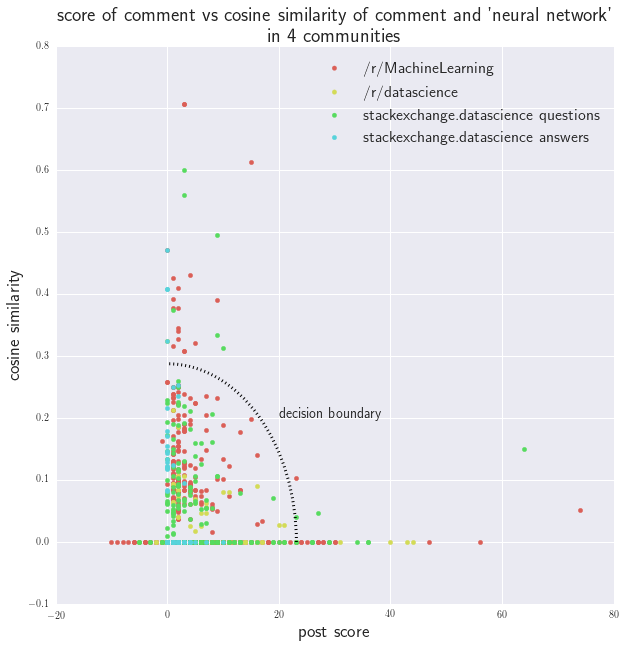

In [58]:
fig=plt.figure()
palette = itertools.cycle(sns.color_palette('hls'))




# /r/MachineLearning
x=[]
y=[]
df=r_MachineLearning_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'neural network'])
plt.scatter(x,y, label='/r/MachineLearning', color=next(palette))

# /r/datascience
x=[]
y=[]
df=r_datascience_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'neural network'])
plt.scatter(x,y, label='/r/datascience', color=next(palette))

# stackexchange.datascience questions
x=[]
y=[]
df=se_datascience_questions_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'neural network'])
plt.scatter(x,y, label='stackexchange.datascience questions', color=next(palette))

# stackexchange.datascience answers
x=[]
y=[]
df=se_datascience_answers_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'neural network'])
plt.scatter(x,y, label='stackexchange.datascience answers', color=next(palette))
    
# decision boundary
ax = fig.add_subplot(111)
e=Arc(xy=(0,0), width=12*r_MachineLearning_df['ups'].std(), height=12*r_MachineLearning_df['neural network'].std(), \
          theta1=0, theta2=90,angle=0, fill=False, lw=3, label='decision boundary', ls='dotted')
ax.add_artist(e)
plt.text(20, .2, 'decision boundary', size=text_size)
    
# cosmetics
plt.title('score of comment vs cosine similarity of comment and \'neural network\'\nin 4 communities', size=title_size)
plt.xlabel('post score', size=label_size)
plt.ylabel('cosine similarity', size=label_size)



fig.set_size_inches(10,10)


plt.legend(loc='upper right', prop={'size':legend_size})


plt.show()

### 'regression'

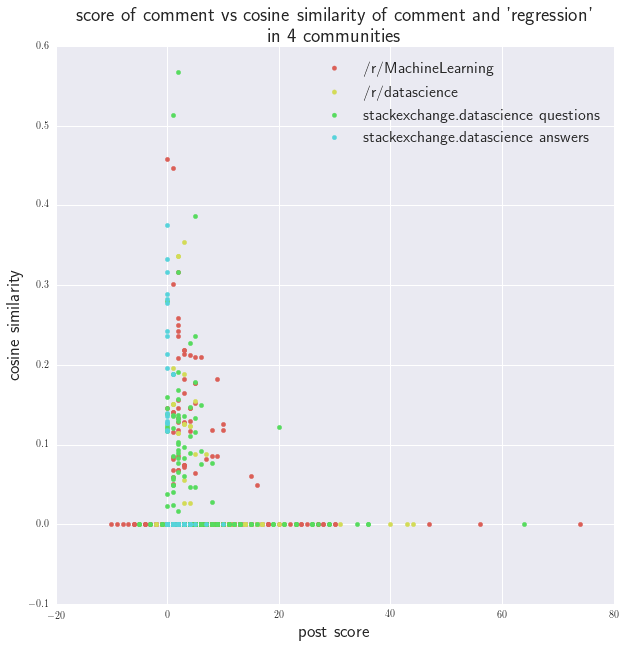

In [22]:
fig=plt.figure()
palette = itertools.cycle(sns.color_palette('hls'))

# /r/MachineLearning
x=[]
y=[]
df=r_MachineLearning_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'regression'])
plt.scatter(x,y, label='/r/MachineLearning', color=next(palette))

# /r/datascience
x=[]
y=[]
df=r_datascience_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'regression'])
plt.scatter(x,y, label='/r/datascience', color=next(palette))

# stackexchange.datascience questions
x=[]
y=[]
df=se_datascience_questions_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'regression'])
plt.scatter(x,y, label='stackexchange.datascience questions', color=next(palette))

# stackexchange.datascience answers
x=[]
y=[]
df=se_datascience_answers_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'regression'])
plt.scatter(x,y, label='stackexchange.datascience answers', color=next(palette))
    
plt.title('score of comment vs cosine similarity of comment and \'regression\'\nin 4 communities', size=title_size)
plt.xlabel('post score', size=label_size)
plt.ylabel('cosine similarity', size=label_size)

plt.legend(loc='upper right', prop={'size':legend_size})

fig.set_size_inches(10,10)

plt.show()

### 'classification'

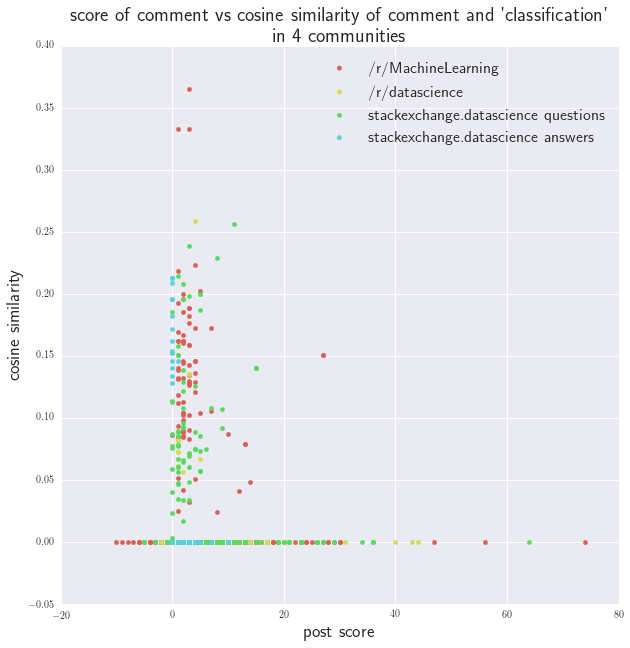

In [23]:
fig=plt.figure()
palette = itertools.cycle(sns.color_palette('hls'))

# /r/MachineLearning
x=[]
y=[]
df=r_MachineLearning_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'classification'])
plt.scatter(x,y, label='/r/MachineLearning', color=next(palette))

# /r/datascience
x=[]
y=[]
df=r_datascience_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'classification'])
plt.scatter(x,y, label='/r/datascience', color=next(palette))

# stackexchange.datascience questions
x=[]
y=[]
df=se_datascience_questions_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'classification'])
plt.scatter(x,y, label='stackexchange.datascience questions', color=next(palette))

# stackexchange.datascience answers
x=[]
y=[]
df=se_datascience_answers_df
for i in range(len(df.loc[:,'ups'])):
    x.append(df.loc[i,'ups'])
    y.append(df.loc[i,'classification'])
plt.scatter(x,y, label='stackexchange.datascience answers', color=next(palette))
    
plt.title('score of comment vs cosine similarity of comment and \'classification\'\nin 4 communities', size=title_size)
plt.xlabel('post score', size=label_size)
plt.ylabel('cosine similarity', size=label_size)

plt.legend(loc='upper right', prop={'size':legend_size})

fig.set_size_inches(10,10)

plt.show()